## 2.3 Explore Data
### Outputs:
- Data Exploration Report

In [2]:
import nltk
import pandas as pd
import math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

from sklearn import datasets, linear_model
import numpy as np
from numbers import Number

In [3]:
train= pd.read_csv("../data/train.csv")
train.set_index('Id')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
def hist_boxplot(column,figsize=(13,8)):
    fig = plt.figure(figsize=figsize) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[1,4])
    ax0 = plt.subplot(gs[0])
    ax0.grid(True)
    ax0.boxplot(column.dropna(),vert=False)
    ax1 = plt.subplot(gs[1])
    ax1.grid(True)
    ax1.hist(column.dropna())
    print (column.describe())
    print ('Null Values:',column.isnull().sum())
    
def hist_and_info(column,figsize=(13,4)):
    column.hist(figsize=figsize)
    print (column.describe())
    print ('Null Values:',column.isnull().sum())
    
def value_counts_and_info(column,figsize=(13,4)):
    column.value_counts().plot(kind='bar',figsize=figsize)
    print (column.value_counts())
    print ('Null Values:',column.isnull().sum())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Null Values: 0


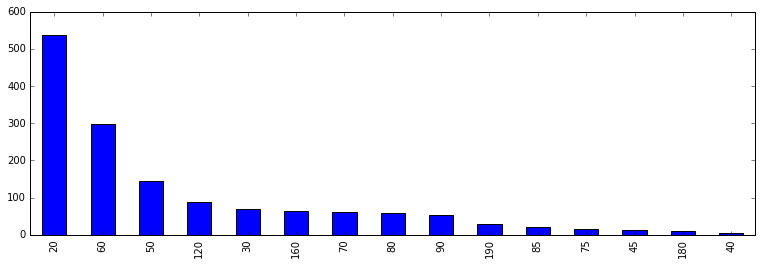

In [5]:
value_counts_and_info(train['MSSubClass'])

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Null Values: 0


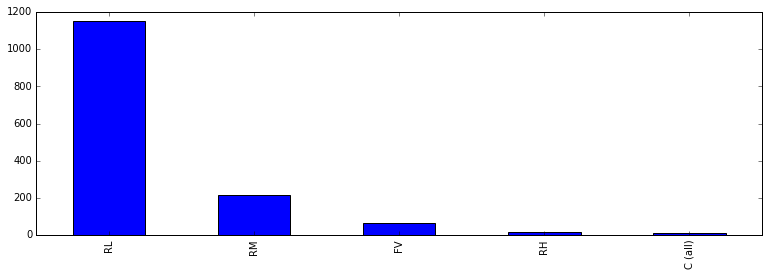

In [6]:
value_counts_and_info(train['MSZoning'])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
Null Values: 259


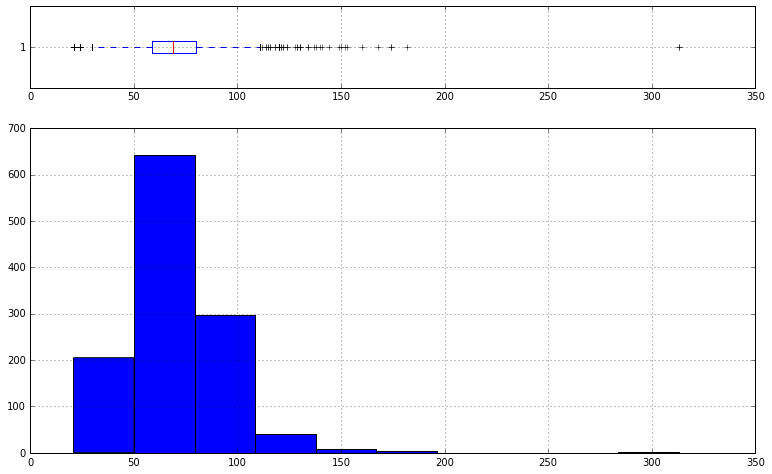

In [7]:
#train['LotFrontage'].hist()
hist_boxplot(train['LotFrontage'])

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
Null Values: 0


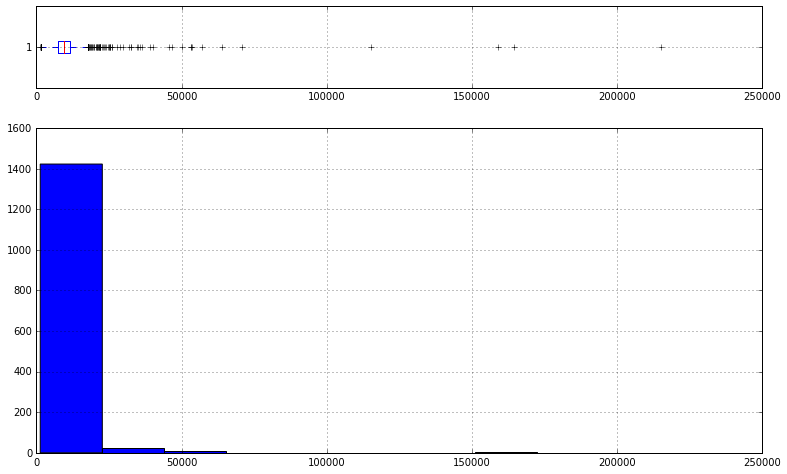

In [8]:
hist_boxplot(train['LotArea'])

Pave    1454
Grvl       6
Name: Street, dtype: int64
Null Values: 0


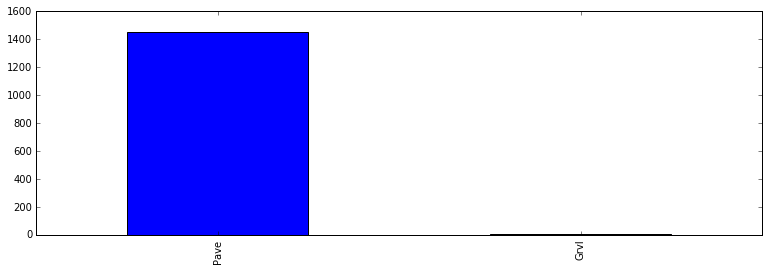

In [9]:
value_counts_and_info(train['Street'])

Grvl    50
Pave    41
Name: Alley, dtype: int64
Null Values: 1369


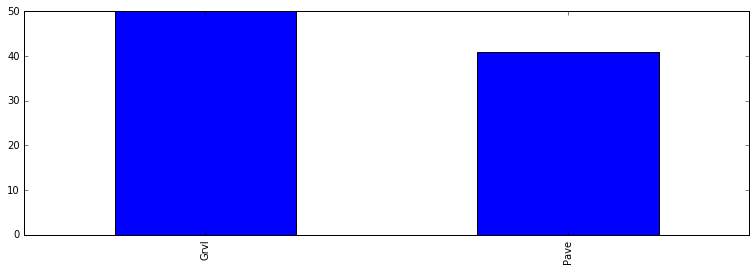

In [10]:
## Se identificaron los valores NaN indica que no hay camino de entrada.
value_counts_and_info(train['Alley'])

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Null Values: 0


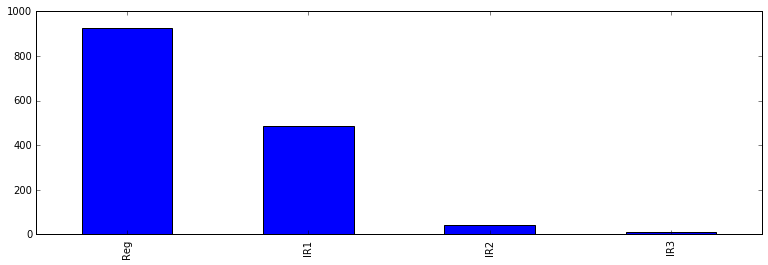

In [11]:
value_counts_and_info(train['LotShape'])

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Null Values: 0


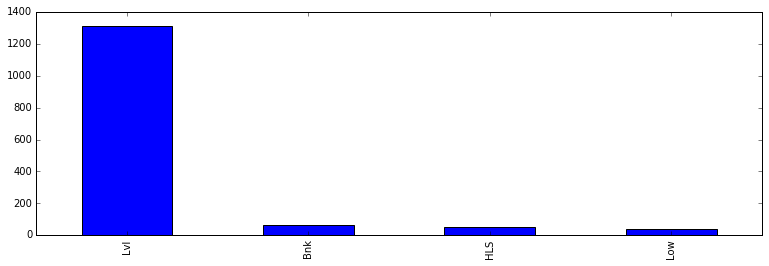

In [12]:
value_counts_and_info(train['LandContour'])

In [13]:
#value_counts_and_info(train['Utilities'])

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Null Values: 0


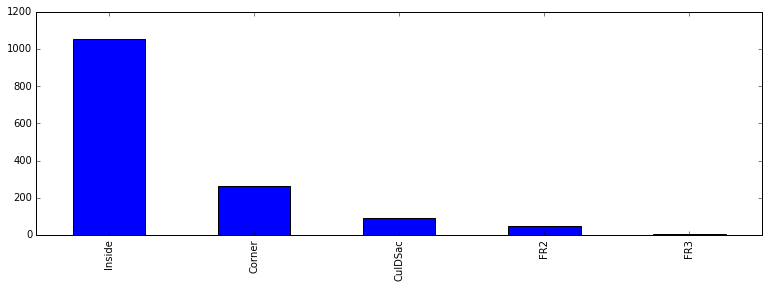

In [14]:
value_counts_and_info(train['LotConfig'])

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Null Values: 0


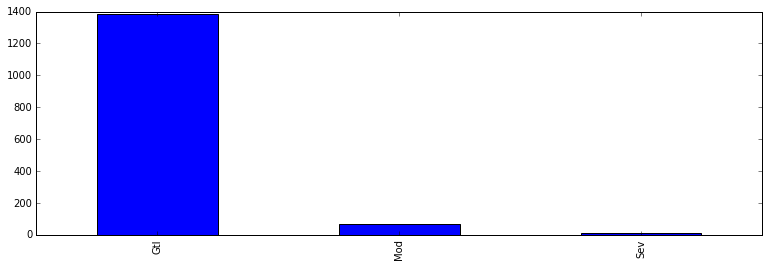

In [15]:
value_counts_and_info(train['LandSlope'])

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Null Values: 0


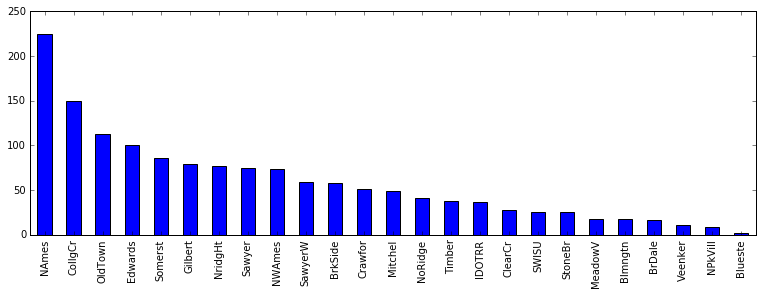

In [16]:
value_counts_and_info(train['Neighborhood'])

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Null Values: 0


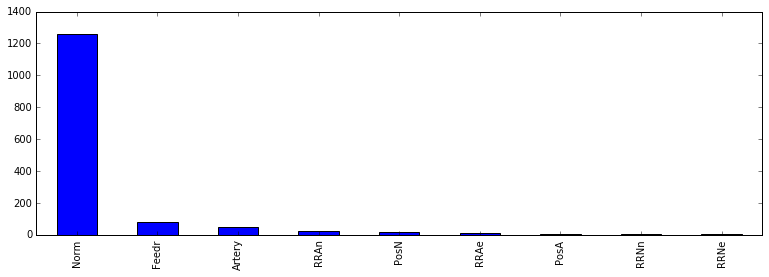

In [17]:
value_counts_and_info(train['Condition1'])

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64
Null Values: 0


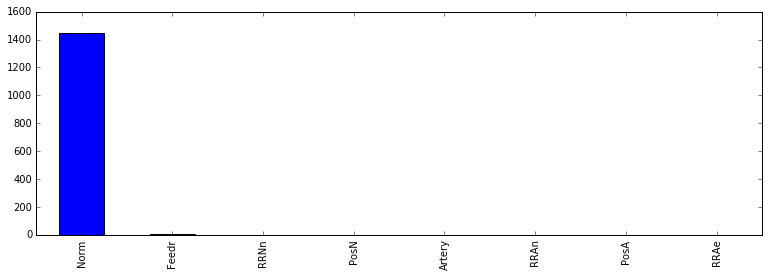

In [18]:
value_counts_and_info(train['Condition2'])

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
Null Values: 0


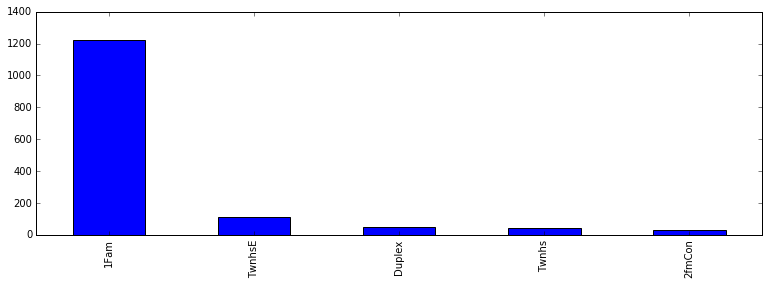

In [19]:
value_counts_and_info(train['BldgType'])

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
Null Values: 0


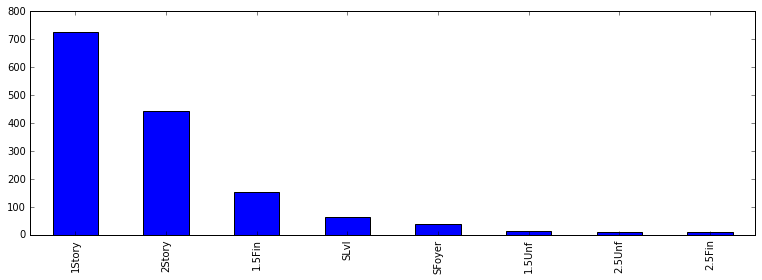

In [20]:
value_counts_and_info(train['HouseStyle'])

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
Null Values: 0


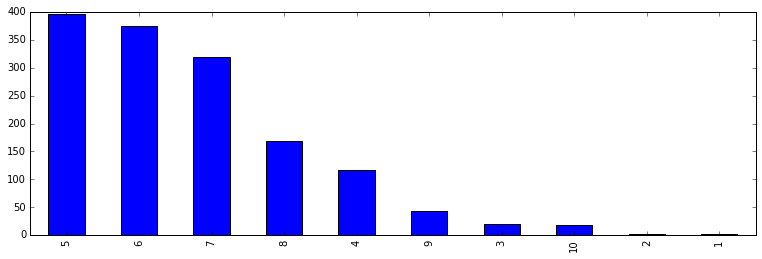

In [21]:
value_counts_and_info(train['OverallQual'])

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
Null Values: 0


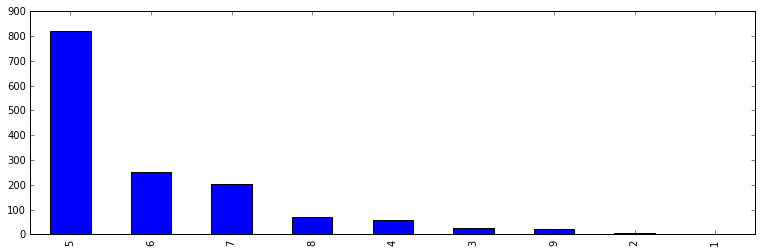

In [22]:
value_counts_and_info(train['OverallCond'])

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
Null Values: 0


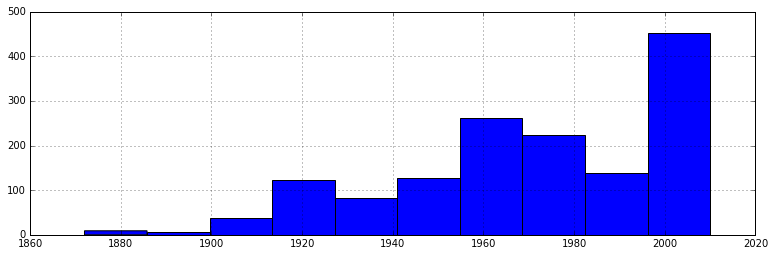

In [23]:
hist_and_info(train['YearBuilt'])

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
Null Values: 0


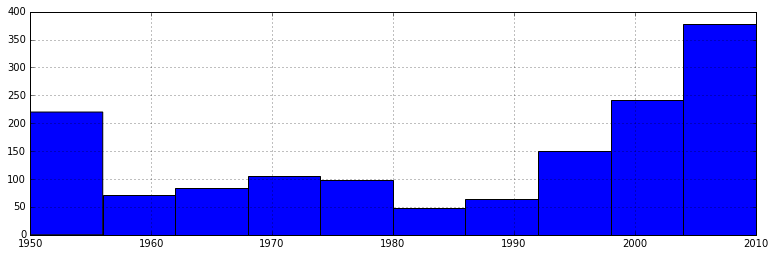

In [24]:
hist_and_info(train['YearRemodAdd'])

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
Null Values: 0


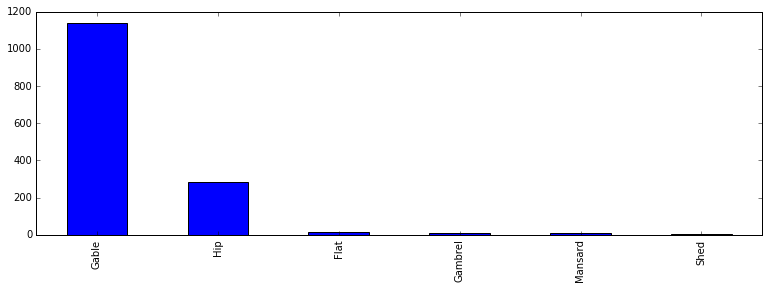

In [25]:
value_counts_and_info(train['RoofStyle'])

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Membran       1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64
Null Values: 0


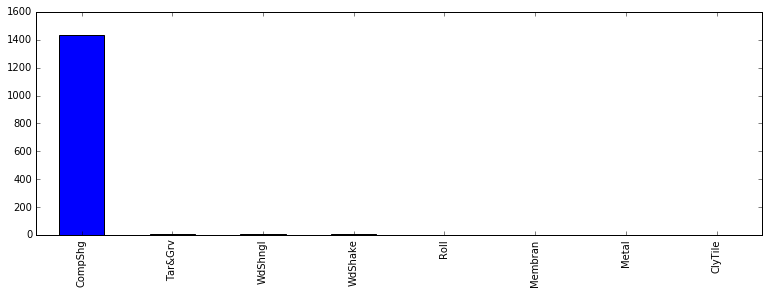

In [26]:
value_counts_and_info(train['RoofMatl'])

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64
Null Values: 0


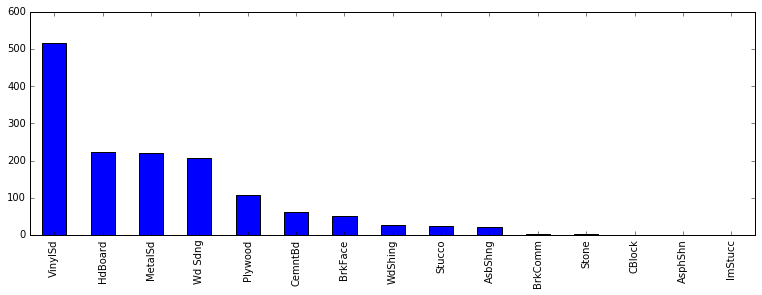

In [27]:
value_counts_and_info(train['Exterior1st'])

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
Null Values: 0


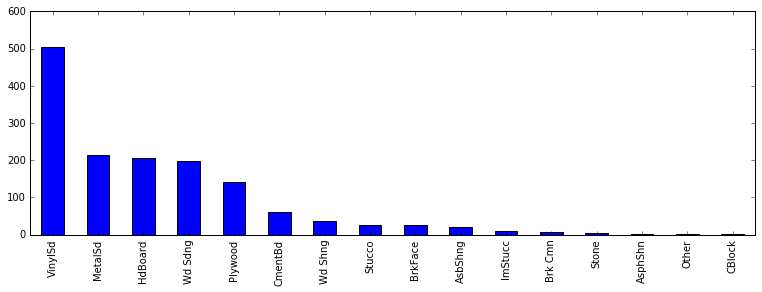

In [28]:
value_counts_and_info(train['Exterior2nd'])

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Null Values: 8


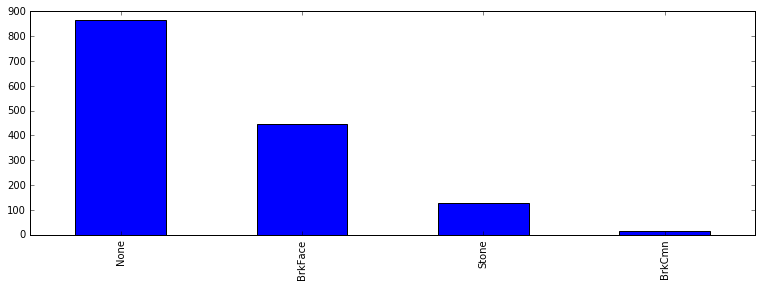

In [29]:
value_counts_and_info(train['MasVnrType'])

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
Null Values: 8


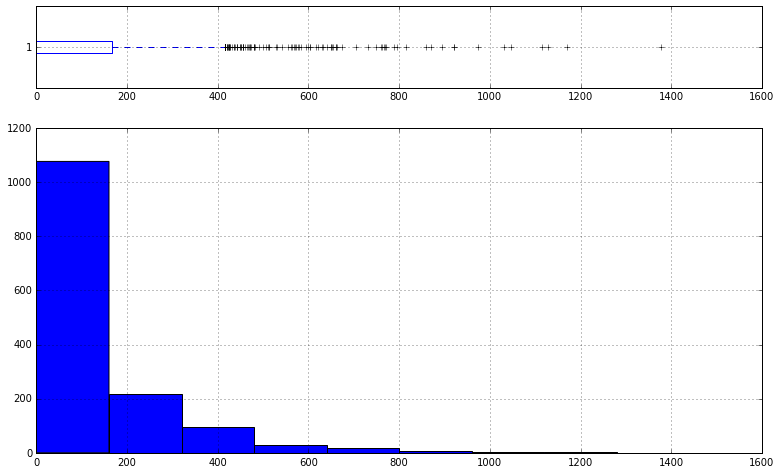

In [30]:
hist_boxplot(train['MasVnrArea'])

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
Null Values: 0


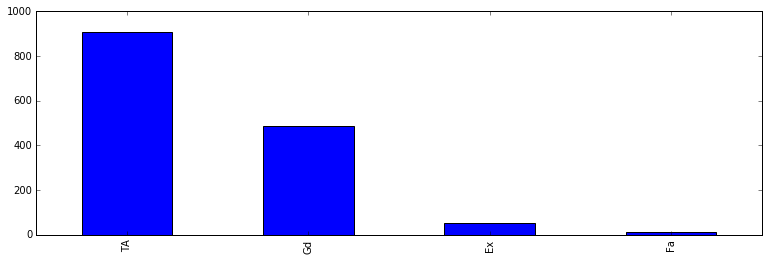

In [31]:
value_counts_and_info(train['ExterQual'])

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
Null Values: 0


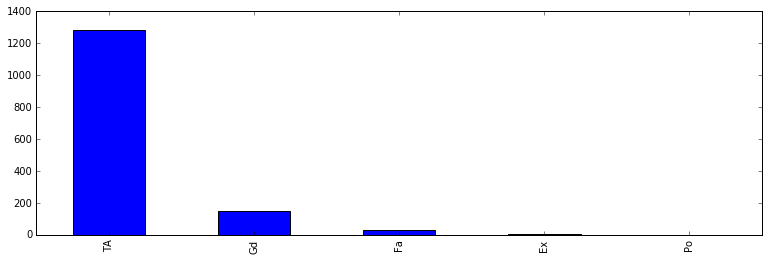

In [32]:
value_counts_and_info(train['ExterCond'])

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
Null Values: 0


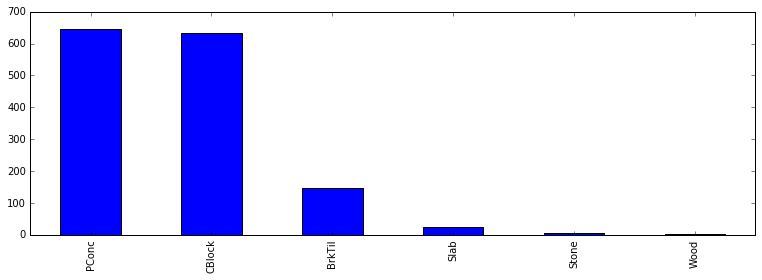

In [33]:
value_counts_and_info(train['Foundation'])

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Null Values: 37


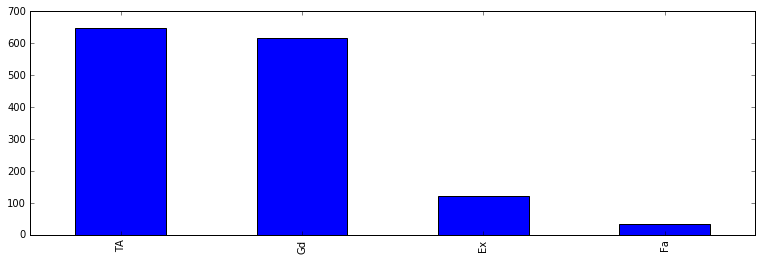

In [34]:
value_counts_and_info(train['BsmtQual'])

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Null Values: 37


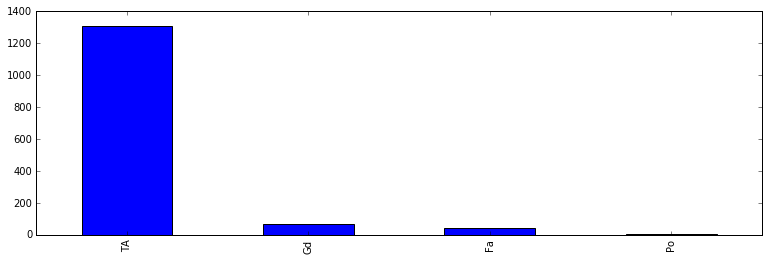

In [35]:
value_counts_and_info(train['BsmtCond'])

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Null Values: 38


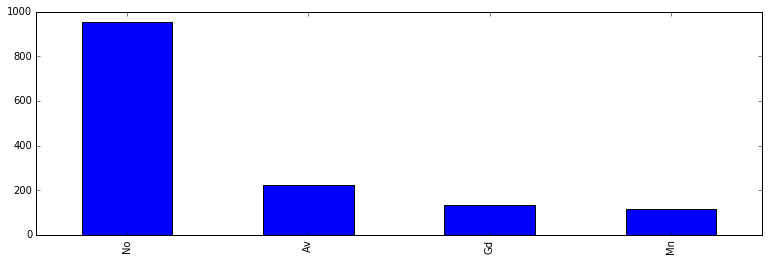

In [36]:
value_counts_and_info(train['BsmtExposure'])

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Null Values: 37


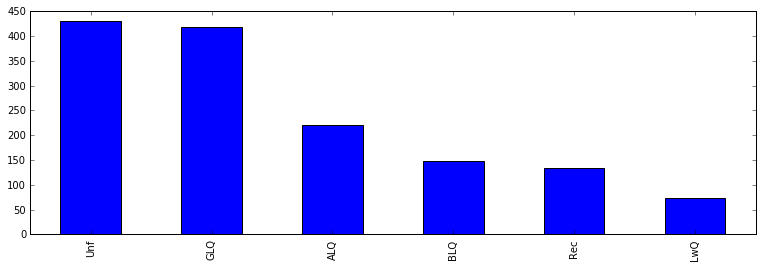

In [37]:
value_counts_and_info(train['BsmtFinType1'])

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
Null Values: 0


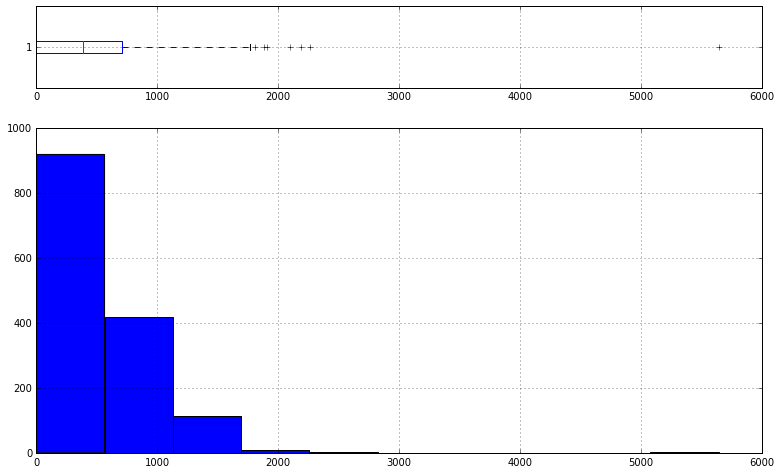

In [38]:
hist_boxplot(train['BsmtFinSF1'])

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Null Values: 38


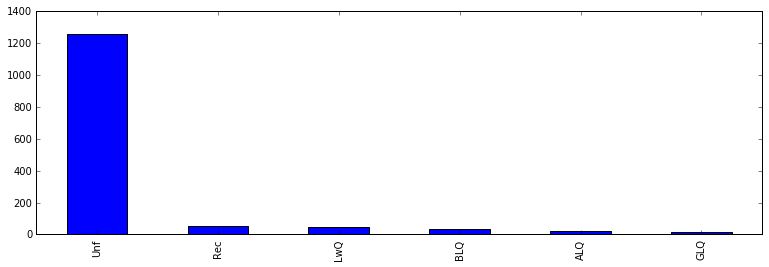

In [39]:
value_counts_and_info(train['BsmtFinType2'])

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64
Null Values: 0


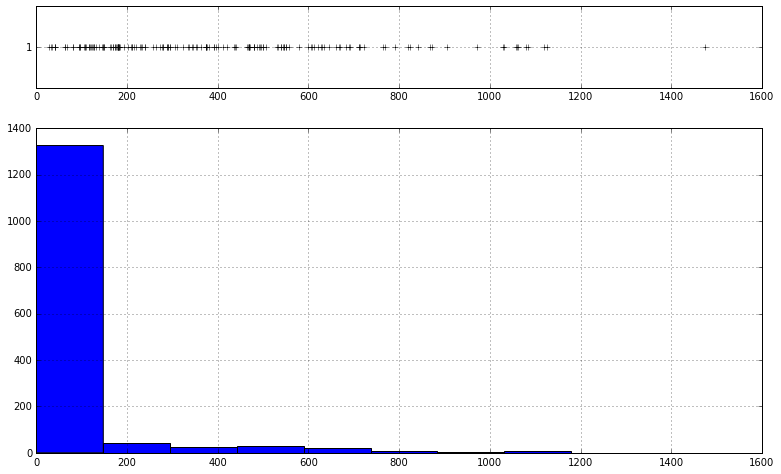

In [40]:
hist_boxplot(train['BsmtFinSF2'])

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
Null Values: 0


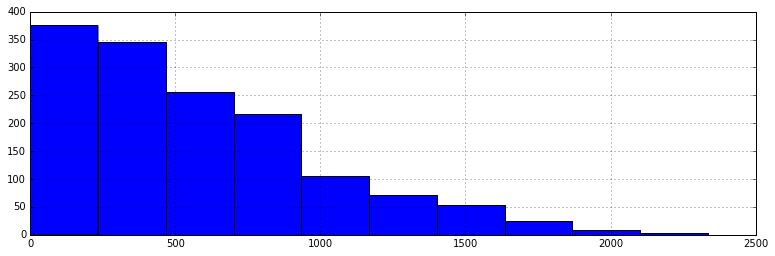

In [41]:
hist_and_info(train['BsmtUnfSF'])

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
Null Values: 0


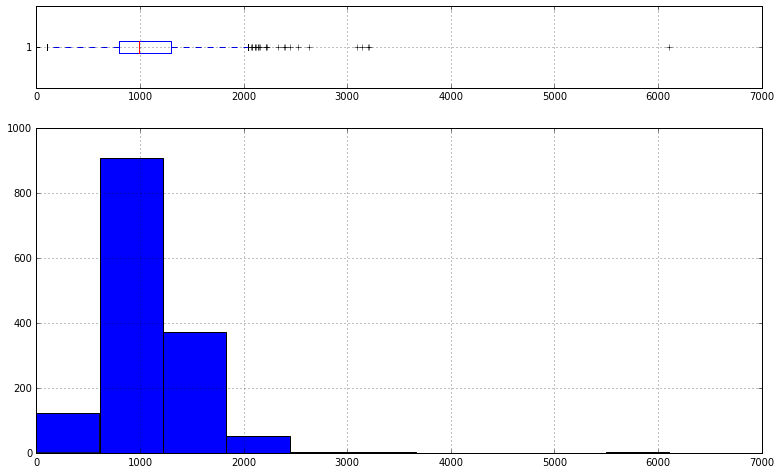

In [42]:
hist_boxplot(train['TotalBsmtSF'])

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Null Values: 0


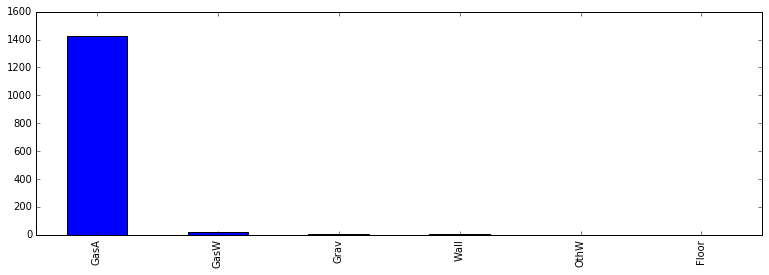

In [43]:
value_counts_and_info(train['Heating'])

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
Null Values: 0


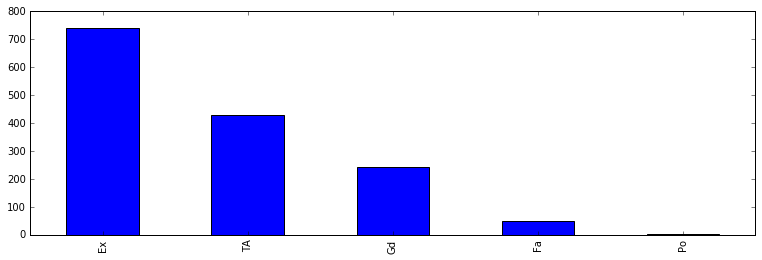

In [44]:
value_counts_and_info(train['HeatingQC'])

Y    1365
N      95
Name: CentralAir, dtype: int64
Null Values: 0


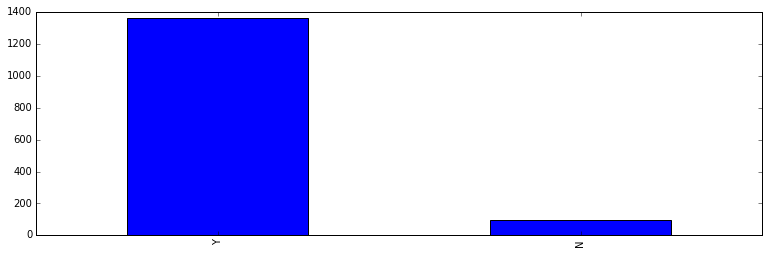

In [45]:
value_counts_and_info(train['CentralAir'])

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Null Values: 1


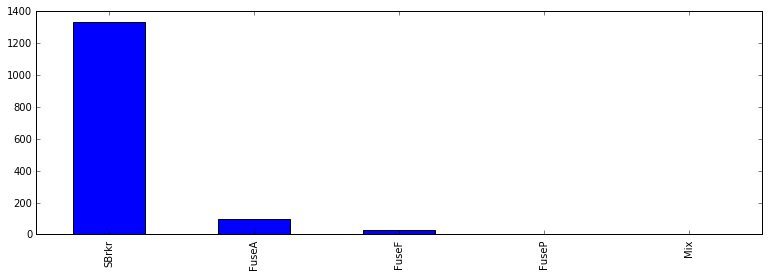

In [46]:
value_counts_and_info(train['Electrical'])

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64
Null Values: 0


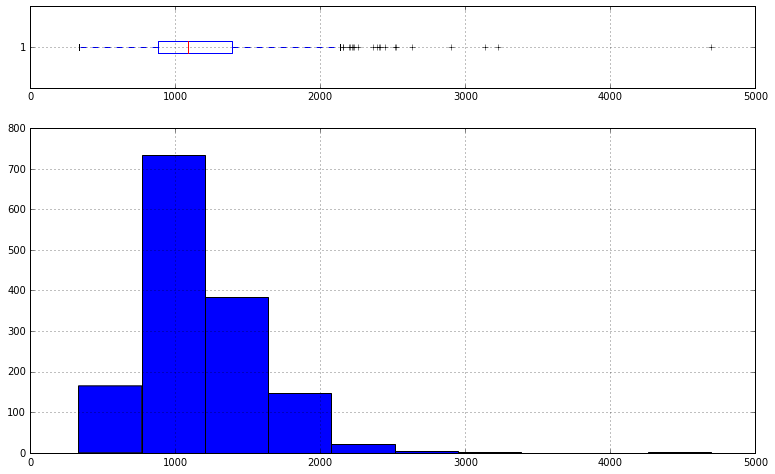

In [47]:
hist_boxplot(train['1stFlrSF'])

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
Null Values: 0


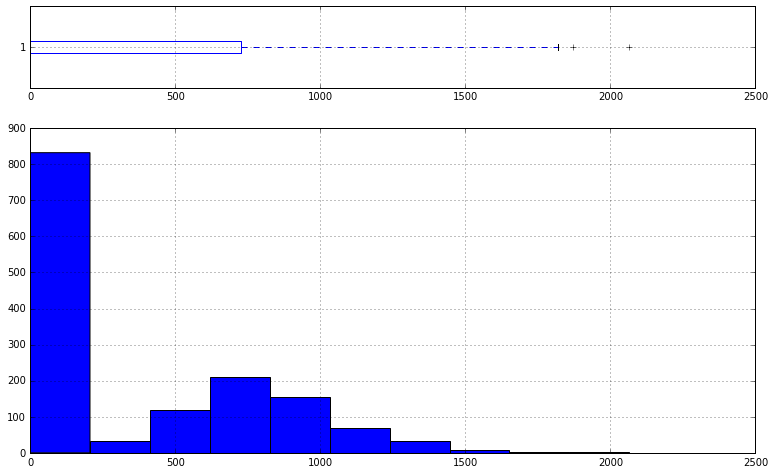

In [48]:
hist_boxplot(train['2ndFlrSF'])

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64
Null Values: 0


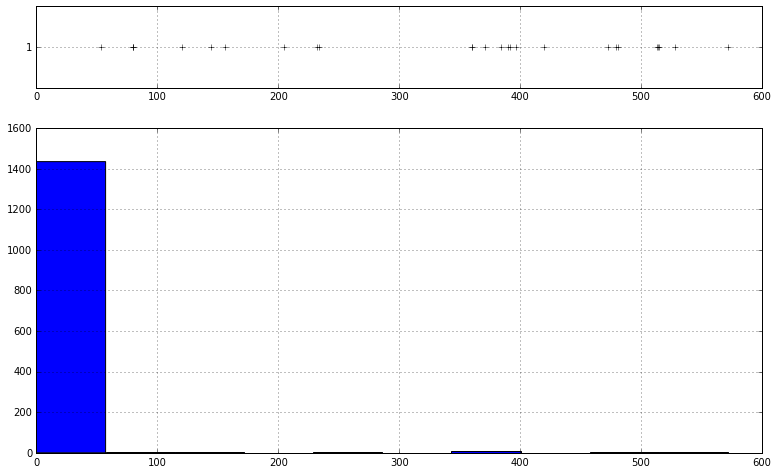

In [49]:
hist_boxplot(train['LowQualFinSF'])

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64
Null Values: 0


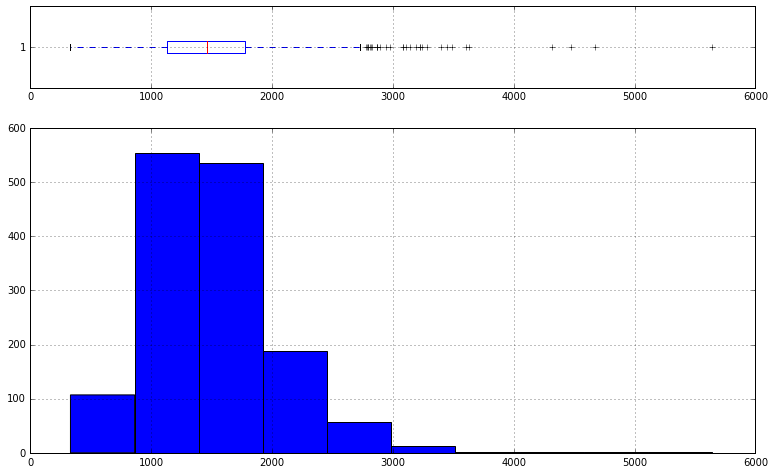

In [50]:
hist_boxplot(train['GrLivArea'])

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
Null Values: 0


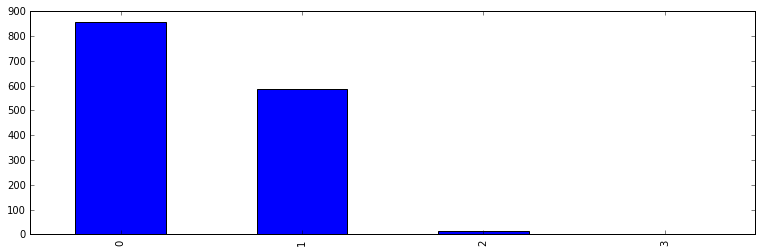

In [51]:
value_counts_and_info(train['BsmtFullBath'])

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
Null Values: 0


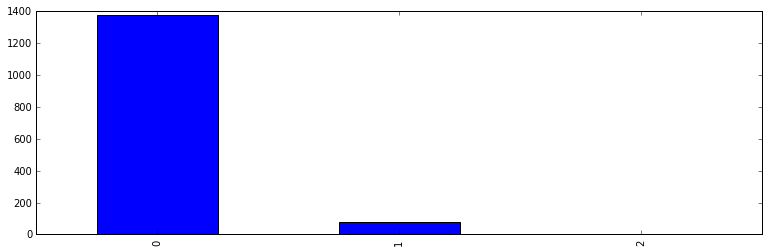

In [52]:
value_counts_and_info(train['BsmtHalfBath'])

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
Null Values: 0


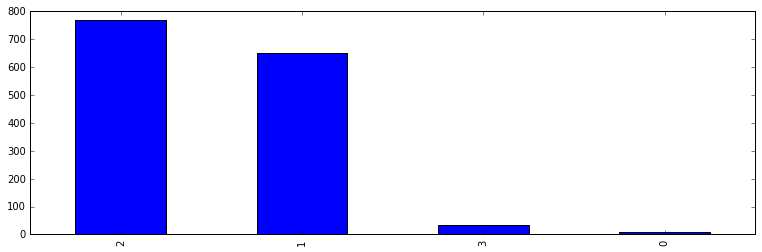

In [53]:
value_counts_and_info(train['FullBath'])

0    913
1    535
2     12
Name: HalfBath, dtype: int64
Null Values: 0


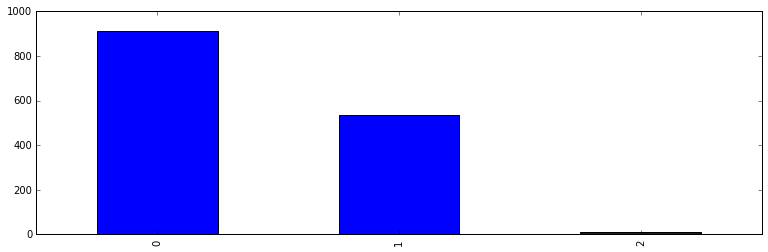

In [54]:
value_counts_and_info(train['HalfBath'])

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64
Null Values: 0


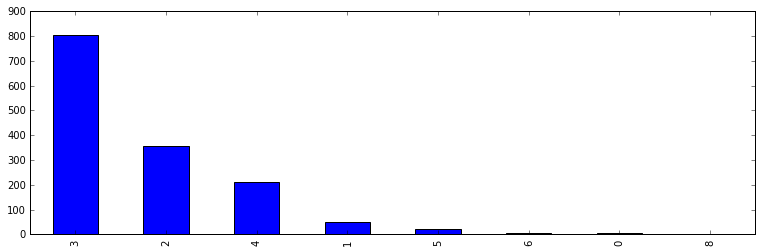

In [55]:
value_counts_and_info(train['BedroomAbvGr'])

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64
Null Values: 0


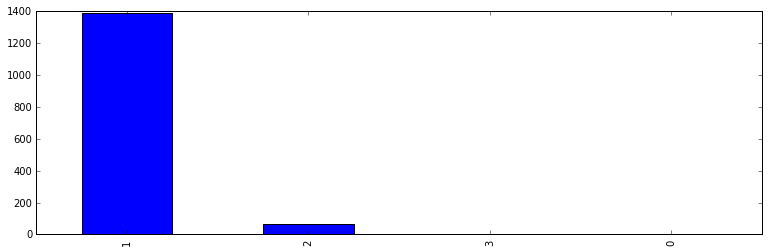

In [56]:
value_counts_and_info(train['KitchenAbvGr'])

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
Null Values: 0


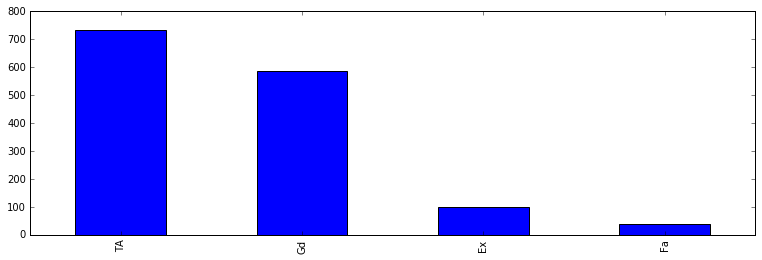

In [57]:
value_counts_and_info(train['KitchenQual'])

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64
Null Values: 0


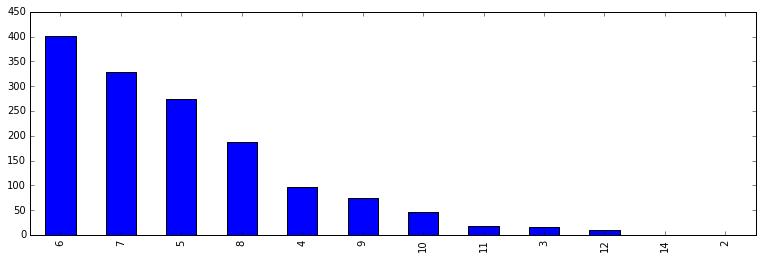

In [58]:
value_counts_and_info(train['TotRmsAbvGrd'])

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64
Null Values: 0


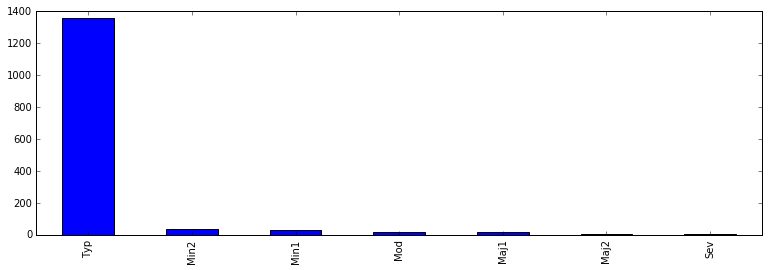

In [59]:
value_counts_and_info(train['Functional'])

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
Null Values: 0


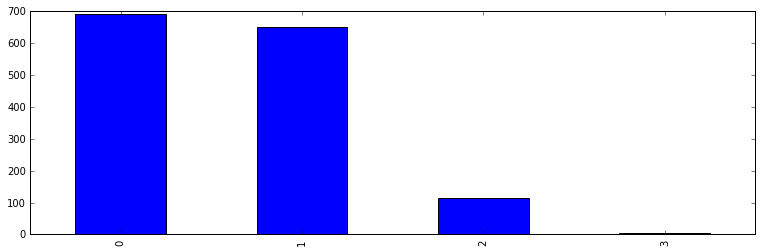

In [60]:
value_counts_and_info(train['Fireplaces'])

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Null Values: 690


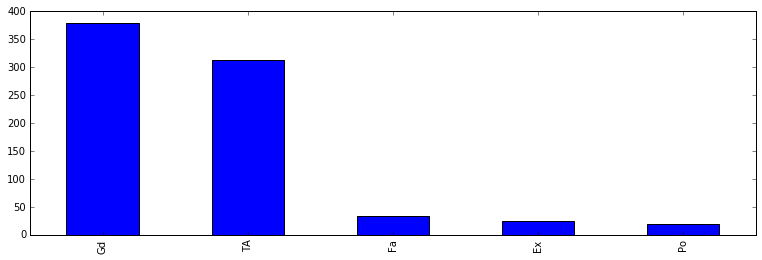

In [61]:
value_counts_and_info(train['FireplaceQu'])

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Null Values: 81


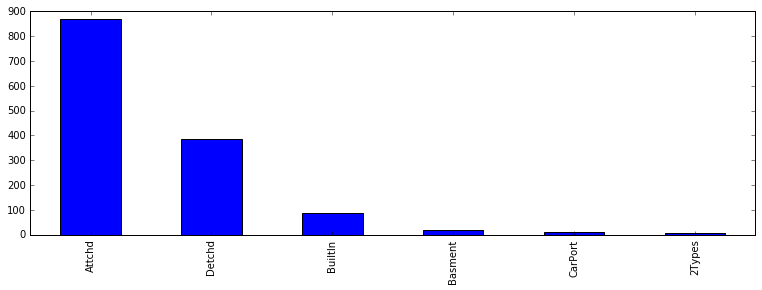

In [62]:
value_counts_and_info(train['GarageType'])

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
Null Values: 81


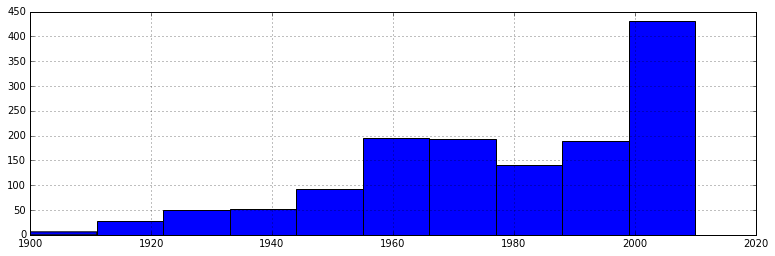

In [63]:
hist_and_info(train['GarageYrBlt'])

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Null Values: 81


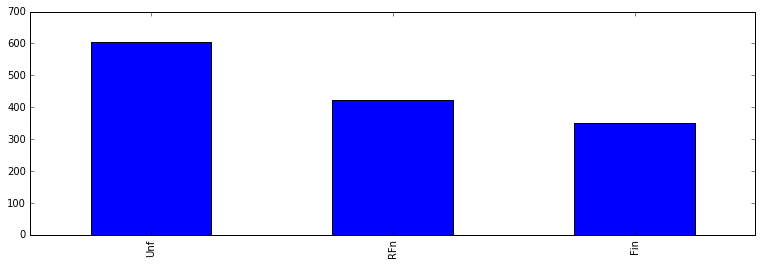

In [64]:
value_counts_and_info(train['GarageFinish'])

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
Null Values: 0


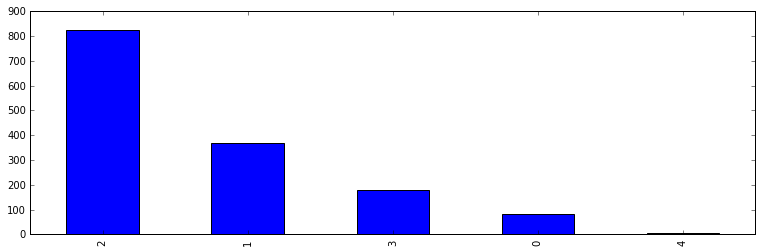

In [65]:
value_counts_and_info(train['GarageCars'])

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64
Null Values: 0


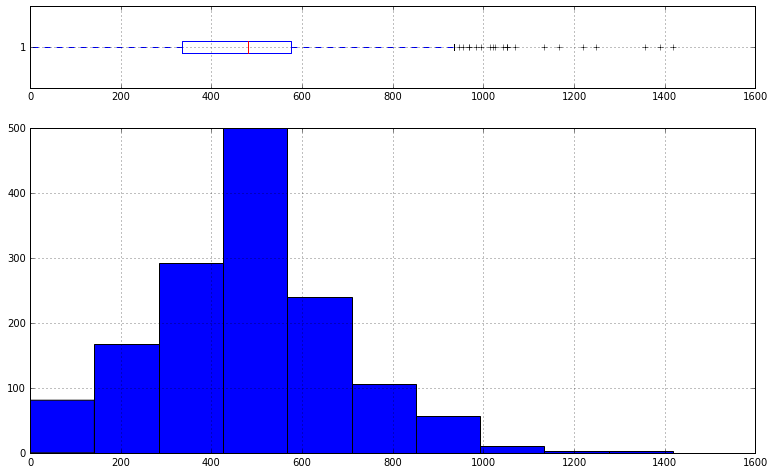

In [66]:
hist_boxplot(train['GarageArea'])

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
Null Values: 81


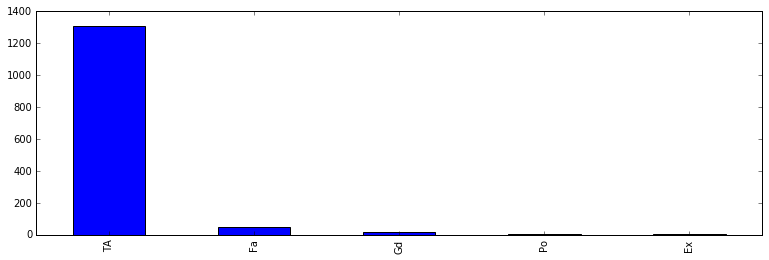

In [67]:
value_counts_and_info(train['GarageQual'])

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Null Values: 81


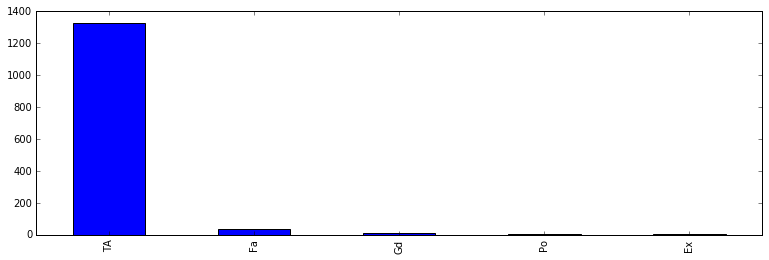

In [68]:
value_counts_and_info(train['GarageCond'])

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
Null Values: 0


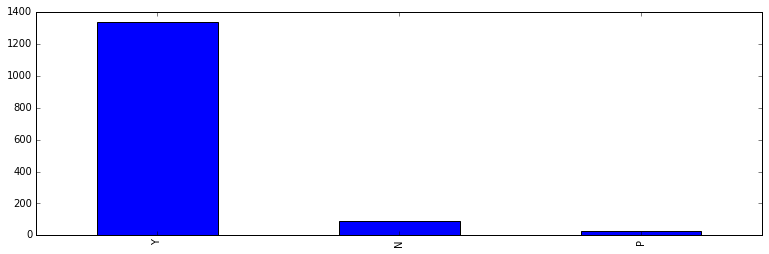

In [69]:
value_counts_and_info(train['PavedDrive'])

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64
Null Values: 0


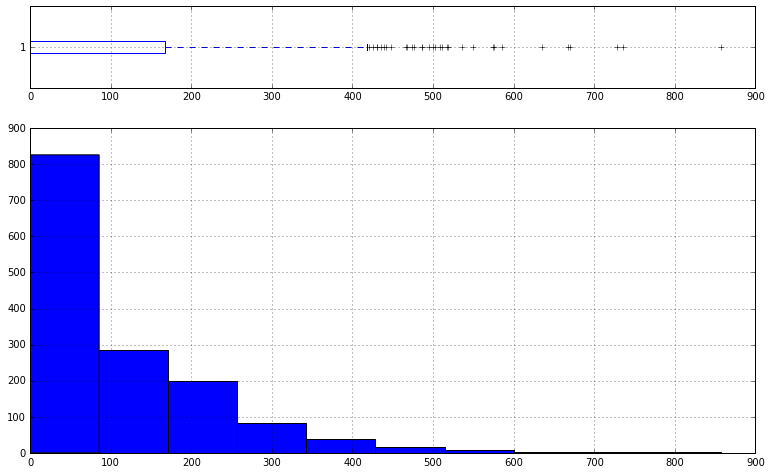

In [70]:
hist_boxplot(train['WoodDeckSF'])

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64
Null Values: 0


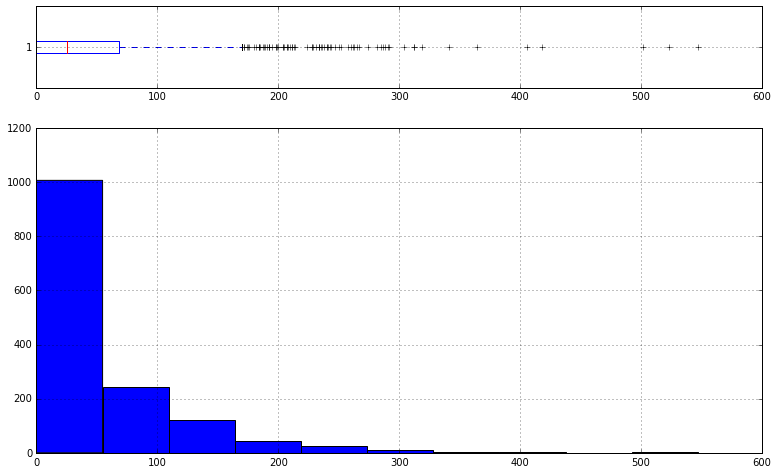

In [71]:
hist_boxplot(train['OpenPorchSF'])

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64
Null Values: 0


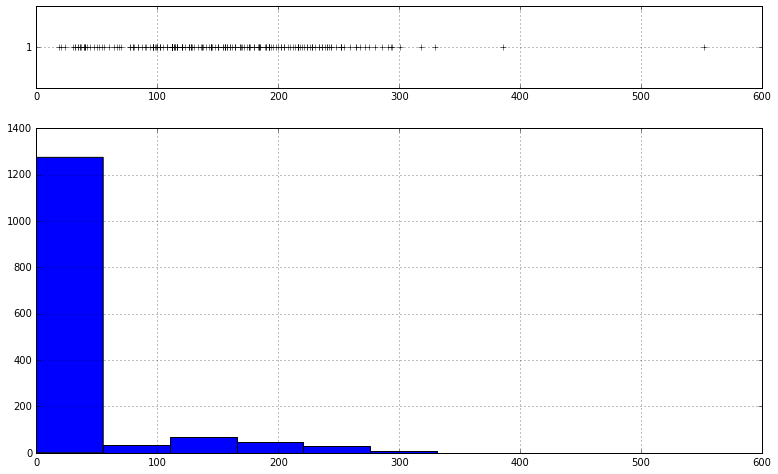

In [72]:
hist_boxplot(train['EnclosedPorch'])

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
Null Values: 0


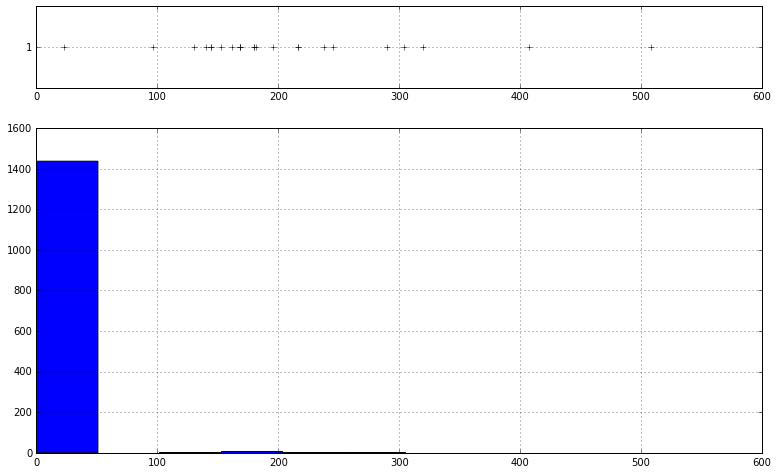

In [73]:
hist_boxplot(train['3SsnPorch'])

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       480.000000
Name: ScreenPorch, dtype: float64
Null Values: 0


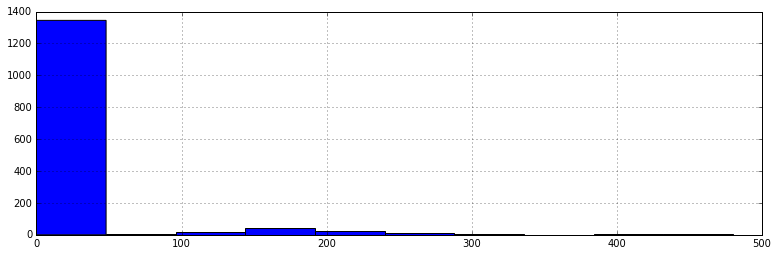

In [74]:
hist_and_info(train['ScreenPorch'])

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64
Null Values: 0


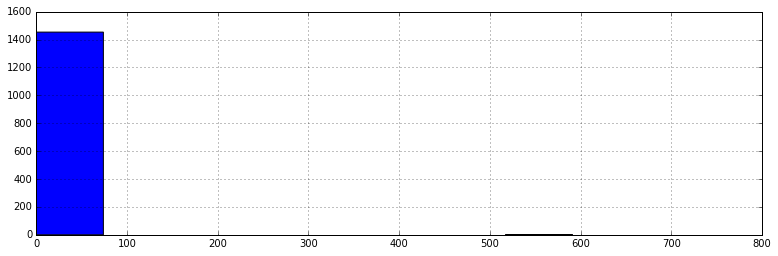

In [75]:
hist_and_info(train['PoolArea'])

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
Null Values: 1453


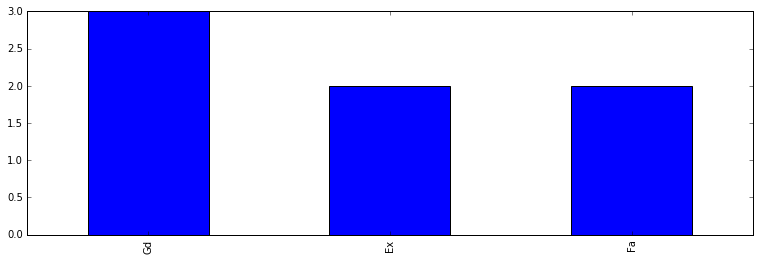

In [76]:
value_counts_and_info(train['PoolQC'])

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Null Values: 1179


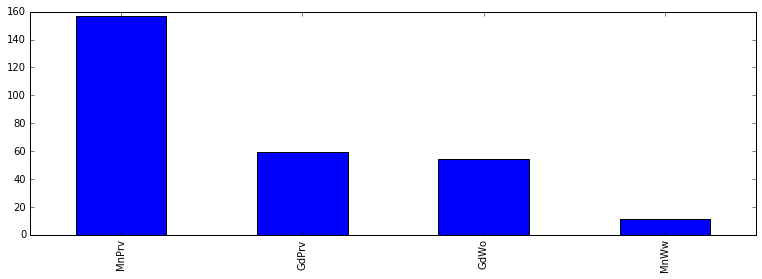

In [77]:
value_counts_and_info(train['Fence'])

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
Null Values: 1406


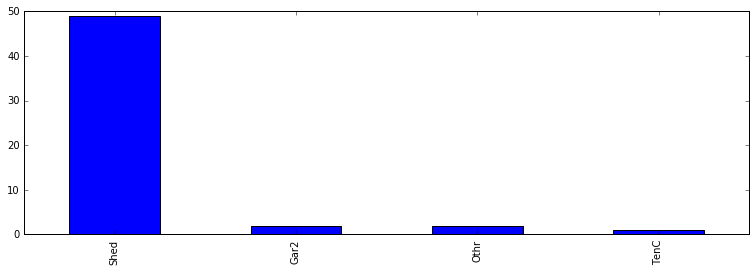

In [78]:
value_counts_and_info(train['MiscFeature'])

0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64
Null Values: 0


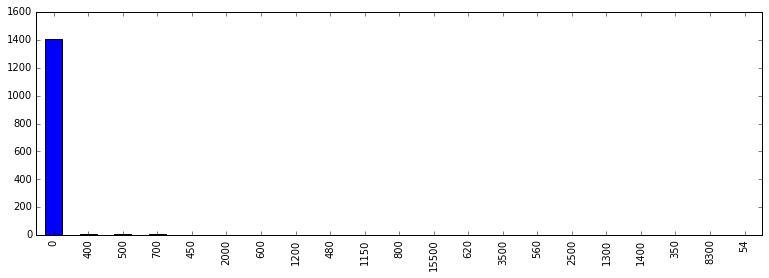

In [79]:
value_counts_and_info(train['MiscVal'])

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
Null Values: 0


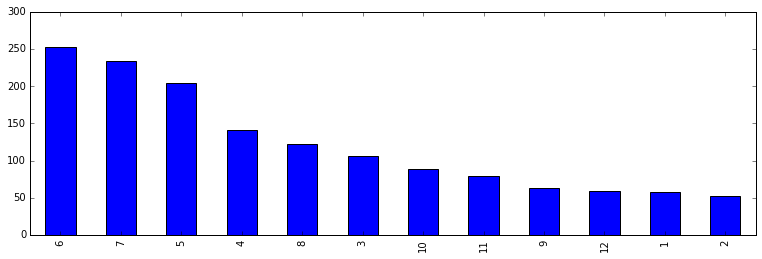

In [80]:
value_counts_and_info(train['MoSold'])

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
Null Values: 0


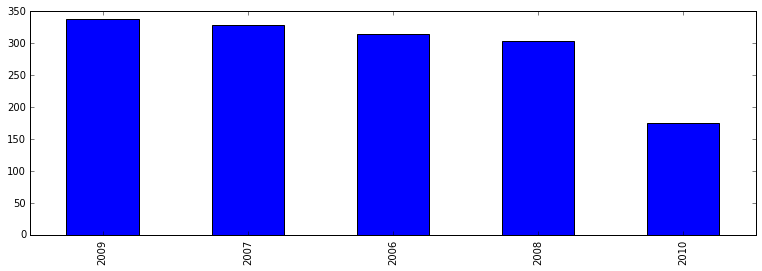

In [81]:
value_counts_and_info(train['YrSold'])

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Null Values: 0


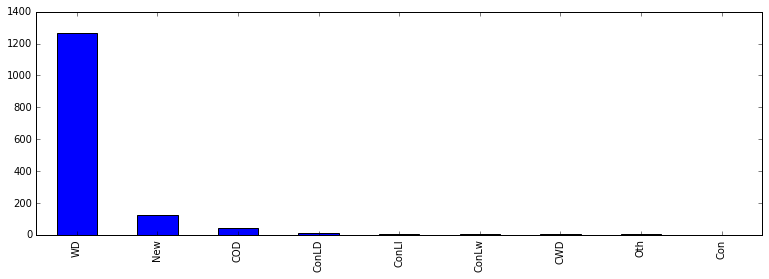

In [82]:
value_counts_and_info(train['SaleType'])

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
Null Values: 0


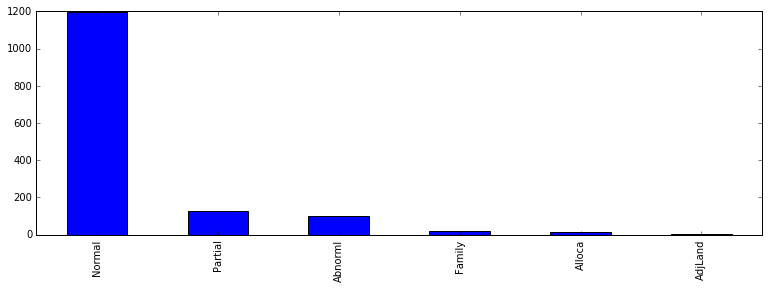

In [83]:
value_counts_and_info(train['SaleCondition'])

## 2.4 Verify Data Quality
### Outputs:

- Data Quality Report